**Self-Assembly of a Dimer System -- Companion Notebook** 

# Numerical Solutions and Simulations 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import fsolve
from scipy.special import lambertw
from scipy.special import comb
from itertools import chain
import time
import copy

from random import shuffle
from random import randint
runif = np.random.rand
import random

start_clock = time.time()

### Contents

**I.** Numerical Solutions to Equilibrium Conditions 

**II.** Monte Carlo Simulation 

**III.** Solutions and Simulations Together

## I. Numerical Solution to Equilibrium Conditions 

We seek to numerically solve the equilibrium conditions 

\begin{equation}
\frac{e^{\beta \Delta}}{2} = \langle m \rangle \frac{N-\langle m \rangle(1- e^{-\beta \Delta})}{\langle k \rangle - \langle m \rangle(1- e^{-\beta \Delta})}, \qquad  \frac{4\sqrt{2}\,\lambda_0^3}{V}\,e^{\beta E_0} = \frac{\langle k \rangle - \langle m \rangle(1- e^{-\beta \Delta})}{\big(N - \langle k \rangle\big)^2}.
\end{equation}

In what follows we define 
\begin{equation}
E_V = \frac{h^2}{2\pi m_0 V^{2/3}},
\end{equation}
as the kinetic energy scale of a single monomer. $E_0$ is the binding energy of an incorrect dimer and $\Delta$ is the binding energy advantage of a correct dimer. 

**-Definitions of $T_I$ and $T_{II}$**:

\begin{equation}
k_BT_I = \frac{2}{3}(E_0 + \Delta) \left[W_{0} \left(\frac{E_0 + \Delta}{3 E_V} \left(2N\right)^{2/3}\right)\right]^{-1}+{\cal O}\left( N^{-1} \right)
\end{equation}

\begin{equation}
k_BT_{II} = \frac{\Delta}{\ln (2N)} + {\cal O}\left(N^{-1}\right)
\end{equation}

#### -Equation solver, Standard deviation definition, $T_I$ and $T_{II}$ definition

In [2]:
### equation solver for the system of equations of state

def myfunc(z, T, E0,Del, Ev, N):
    
    m = z[0]
    k = z[1]
    
    F = np.ones(2)

    F[0]=  m*(N-m*(1-np.exp(-Del/T))) - np.exp(Del/T)*(k-m*(1-np.exp(-Del/T)))/2
    F[1] =  (k-m*(1-np.exp(-Del/T))) - 4*np.sqrt(2)*np.exp(E0/T)*(Ev/T)**(3/2)*(N-k)**2
      
    return F

## testing values 
E0 =1.0
Del = .05
Ev = 0.001
Nelem = 50
fsolve(myfunc, [.05, 1.0], args = (.7, E0, Del, Ev, Nelem))

array([0.03045014, 2.83707918])

In [3]:
# variances and covariances

def sigma_k(k, N):
    
    return np.sqrt(1.0/(2*N)*k*(N-k))

def sigma_m(k, m, N): 
    
    return np.sqrt(m - m**2/2*(1/k + 1/N))

In [4]:
## definition of temperature T1

def kbT1(E0,Del, Ev, N):
    
    En = E0 + Del
    
    return (2*En/3)/lambertw(En/(3*Ev)*(2*N)**(2/3)).real

# definition of temperature T2

def kbT2(Del, N):
    
    return Del/np.log(2*N)

In [5]:
### equation solver for critical temperature

def Temp_func_new(T, E0,Del, Ev, N):
    
    
    return np.sqrt(2)*np.exp((E0+Del)/T)*(Ev/T)**(3/2)*(1 - 2*N*np.exp(-Del/T))**2-(N-1/2)

## testing values 
E0 = 14.0
Del = 3.45
Ev = 0.001
Nelem = 50
## test
fsolve(Temp_func_new, 0.2, args = (E0, Del, Ev, Nelem))[0]

0.7479730336717832

#### Plots of solutions to equation solver

#### (a)  Type I 

/Users/mobolajiwilliams/opt/miniconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-3-e50bab83d70c>:9: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m - m**2/2*(1/k + 1/N))


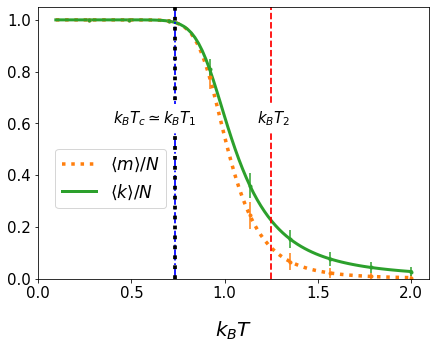

kBT_I = 0.7352029642942484
kBT_II = 1.248596635471849


In [6]:
## Plot of a <k> and <m> for a Type I dimer system

plt.figure(figsize = (7,5))

# physical parameters
E0 =4.15
Del =5.75
Ev = 10**(-3)
Nelem = 50

# temperature limits
Tmin = .055
Tmax = 2.0


# spectrum of temperature values; empty vectors for means
temp_vals = np.linspace(Tmin, Tmax, 100)
kvals = np.ones(len(temp_vals))
mvals = np.ones(len(temp_vals))

# generating values of k and m means
for k in range(len(temp_vals)):
    mvals[k], kvals[k]  = fsolve(myfunc, [.05, 1.0], args = (temp_vals[k], E0,Del, Ev, Nelem))


#plot of k and m versus T; means 
plt.plot(temp_vals[2:], mvals[2:]/Nelem, color = 'C1', linestyle='dotted', label = r'$\langle m \rangle/N$', linewidth = 3.5)
plt.plot(temp_vals[2:], kvals[2:]/Nelem, color = 'C2', linestyle='solid', label = r'$\langle k \rangle/N$', linewidth = 3.0)
    
# spectrum of temperature values; empty vectors for standard deviations
temp_vals_err = np.linspace(Tmin, Tmax, 10)
kvals_err = np.ones(len(temp_vals_err))
mvals_err = np.ones(len(temp_vals_err))

# generating values of k and m standard deviations
for k in range(len(temp_vals_err)):
    mvals_err[k], kvals_err[k]  = fsolve(myfunc, [.05, 1.0], args = (temp_vals_err[k], E0,Del, Ev, Nelem))

#plot of k and m versus T; standard deviations
plt.errorbar(temp_vals_err[1:], mvals_err[1:]/Nelem, color = 'C1', fmt = '.', yerr = sigma_m(kvals_err[1:], mvals_err[1:], Nelem)/Nelem)
plt.errorbar(temp_vals_err[1:], kvals_err[1:]/Nelem, color = 'C2', fmt = '.', yerr = sigma_k(kvals_err[1:], Nelem)/Nelem)

# plot of critical temperatures
plt.axvline(x= kbT1(E0, Del, Ev, Nelem).real, color = 'blue', linestyle='-.', linewidth = 1.75)
plt.axvline(x= kbT2(Del, Nelem), color = 'red', linestyle='dashed', linewidth = 1.75)
plt.axvline(x= fsolve(Temp_func_new, 0.2, args = (E0, Del, Ev, Nelem))[0], color = 'k', linestyle=':', linewidth = 3.75)


# path design options
plt.xlabel(r'$k_B T$', fontsize = 20)
ax = plt.gca()
ax.set_ylim([0,1.05])
ax.yaxis.set_label_coords(-0.1,.5)
ax.xaxis.set_label_coords(.5,-.15)

ax.text(0.4, 0.6, r'$k_BT_c \simeq k_BT_1$', color='black', fontsize = 15,
        bbox=dict(facecolor='white', edgecolor='none', pad=5.0))
ax.text(1.175, 0.6, r'$k_BT_2$', color='black', fontsize = 15,
        bbox=dict(facecolor='white', edgecolor='none', pad=5.0))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(bbox_to_anchor = (.35,0.51), fontsize = 17)

warnings.simplefilter("ignore")

plt.show()

#temperatures T_I and T_II 
print("kBT_I =", kbT1(E0, Del, Ev, Nelem).real)
print("kBT_II =",kbT2(Del, Nelem))

#### (b) Edge of Type I and Type II systems

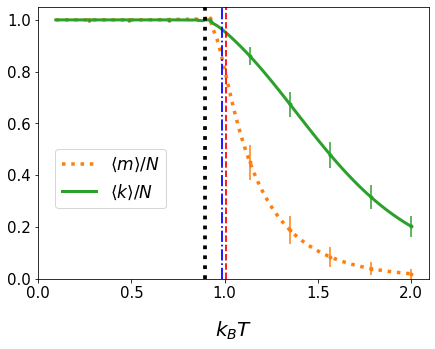

kBT_I = 0.9852696789666392
kBT_II = 1.0097346704250605


In [7]:
##  Plot of a <k> and <m> for system intermediate between Types I and II dimer system

plt.figure(figsize = (7,5))

# physical parameters
E0 =9.05
Del =4.65
Ev = 10**(-3)
Nelem = 50

# temperature limits
Tmin = .055
Tmax = 2.0


# spectrum of temperature values; empty vectors for means
temp_vals = np.linspace(Tmin, Tmax, 100)
kvals = np.ones(len(temp_vals))
mvals = np.ones(len(temp_vals))

# generating values of k and m means
for k in range(len(temp_vals)):
    mvals[k], kvals[k]  = fsolve(myfunc, [.05, 1.0], args = (temp_vals[k], E0,Del, Ev, Nelem))


#plot of k and m versus T; means 
plt.plot(temp_vals[2:], mvals[2:]/Nelem, color = 'C1', linestyle='dotted', label = r'$\langle m \rangle/N$', linewidth = 3.5)
plt.plot(temp_vals[2:], kvals[2:]/Nelem, color = 'C2', linestyle='solid', label = r'$\langle k \rangle/N$', linewidth = 3.0)
    
# spectrum of temperature values; empty vectors for standard deviations
temp_vals_err = np.linspace(Tmin, Tmax, 10)
kvals_err = np.ones(len(temp_vals_err))
mvals_err = np.ones(len(temp_vals_err))

# generating values of k and m standard deviations
for k in range(len(temp_vals_err)):
    mvals_err[k], kvals_err[k]  = fsolve(myfunc, [.05, 1.0], args = (temp_vals_err[k], E0,Del, Ev, Nelem))

#plot of k and m versus T; standard deviations
plt.errorbar(temp_vals_err[1:], mvals_err[1:]/Nelem, color = 'C1', fmt = '.', yerr = sigma_m(kvals_err[1:], mvals_err[1:], Nelem)/Nelem)
plt.errorbar(temp_vals_err[1:], kvals_err[1:]/Nelem, color = 'C2', fmt = '.', yerr = sigma_k(kvals_err[1:], Nelem)/Nelem)

plt.axvline(x= kbT1(E0, Del, Ev, Nelem).real, color = 'blue', linestyle='-.', linewidth = 1.75)
plt.axvline(x= kbT2(Del, Nelem), color = 'red', linestyle='dashed', linewidth = 1.75)
plt.axvline(x= fsolve(Temp_func_new, 0.2, args = (E0, Del, Ev, Nelem))[0], color = 'k', linestyle=':', linewidth = 3.75)


# path design options
plt.xlabel(r'$k_B T$', fontsize = 20)
ax = plt.gca()
ax.set_ylim([0,1.05])
ax.yaxis.set_label_coords(-0.1,.5)
ax.xaxis.set_label_coords(.5,-.15)

#ax.text(0.4, 0.6, r'$k_BT_c \simeq k_BT_1$', color='black', fontsize = 15,
#        bbox=dict(facecolor='white', edgecolor='none', pad=5.0))
#ax.text(1.175, 0.6, r'$k_BT_2$', color='black', fontsize = 15,
#        bbox=dict(facecolor='white', edgecolor='none', pad=5.0))

plt.tick_params(axis='both', which='major', labelsize=15)
#plt.xticks([0.00, 0.25, 0.50, kbTk(E0, Del, Ev, Nelem),1.0, Del/np.log(2*Nelem), 1.50, 1.75, 2.00, 2.25, 2.5], [0.0,'' ,.5 , r'$ k_BT_k$', 1.0, r'$ k_BT_m$', 1.5 ,'' ,'2.0', '', '2.5' ], fontsize = 15)
plt.legend(bbox_to_anchor = (.35,0.51), fontsize = 17)

warnings.simplefilter("ignore")

plt.show()

#temperatures T_I and T_II 
print("kBT_I =", kbT1(E0, Del, Ev, Nelem).real)
print("kBT_II =",kbT2(Del, Nelem))

#### (c) Type II systems

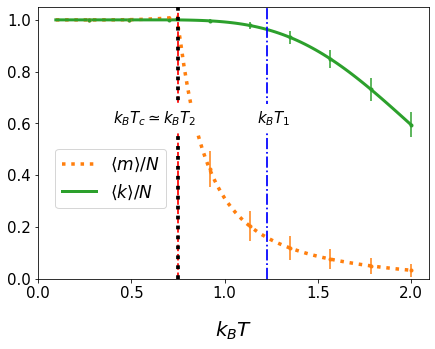

kBT_I = 1.2260437453743969
kBT_II = 0.7491579812831094


In [8]:
## Plot of a <k> and <m> for a Type II dimer system

plt.figure(figsize = (7,5))

# physical parameters
E0 =14.00
Del = 3.45
Ev = 10**(-3)
Nelem = 50

# temperature limits
Tmin = .055
Tmax = 2.0


# spectrum of temperature values; empty vectors for means
temp_vals = np.linspace(Tmin, Tmax, 100)
kvals = np.ones(len(temp_vals))
mvals = np.ones(len(temp_vals))

# generating values of k and m means
for k in range(len(temp_vals)):
    mvals[k], kvals[k]  = fsolve(myfunc, [0.5, 0.5], args = (temp_vals[k], E0,Del, Ev, Nelem))


#plot of k and m versus T; means 
plt.plot(temp_vals[2:], mvals[2:]/Nelem, color = 'C1', linestyle='dotted', label = r'$\langle m \rangle/N$', linewidth = 3.5)
plt.plot(temp_vals[2:], kvals[2:]/Nelem, color = 'C2', linestyle='solid', label = r'$\langle k \rangle/N$', linewidth = 3.0)
    
# spectrum of temperature values; empty vectors for standard deviations
temp_vals_err = np.linspace(Tmin, Tmax, 10)
kvals_err = np.ones(len(temp_vals_err))
mvals_err = np.ones(len(temp_vals_err))

# generating values of k and m standard deviations
for k in range(len(temp_vals_err)):
    mvals_err[k], kvals_err[k]  = fsolve(myfunc, [.05, 1.0], args = (temp_vals_err[k], E0,Del, Ev, Nelem))

#plot of k and m versus T; standard deviations
plt.errorbar(temp_vals_err[1:], mvals_err[1:]/Nelem, color = 'C1', fmt = '.', yerr = sigma_m(kvals_err[1:], mvals_err[1:], Nelem)/Nelem)
plt.errorbar(temp_vals_err[1:], kvals_err[1:]/Nelem, color = 'C2', fmt = '.', yerr = sigma_k(kvals_err[1:], Nelem)/Nelem)

# plot of critical temperatures
plt.axvline(x= kbT1(E0, Del, Ev, Nelem).real, color = 'blue', linestyle='-.', linewidth = 1.75)
plt.axvline(x= kbT2(Del, Nelem), color = 'red', linestyle='dashed', linewidth = 1.75)
plt.axvline(x= fsolve(Temp_func_new, 0.2, args = (E0, Del, Ev, Nelem))[0], color = 'k', linestyle=':', linewidth = 3.75)


# path design options
plt.xlabel(r'$k_B T$', fontsize = 20)
ax = plt.gca()
ax.set_ylim([0,1.05])
ax.yaxis.set_label_coords(-0.1,.5)
ax.xaxis.set_label_coords(.5,-.15)

ax.text(0.4, 0.6, r'$k_BT_c \simeq k_BT_2$', color='black', fontsize = 15,
        bbox=dict(facecolor='white', edgecolor='none', pad=5.0))
ax.text(1.175, 0.6, r'$k_BT_1$', color='black', fontsize = 15,
        bbox=dict(facecolor='white', edgecolor='none', pad=5.0))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(bbox_to_anchor = (.35,.51), fontsize = 17)

warnings.simplefilter("ignore")


plt.show()

#temperatures T_I and T_II 
print("kBT_I =", kbT1(E0, Del, Ev, Nelem).real)
print("kBT_II =",kbT2(Del, Nelem))

## II. Monte Carlo Simulations 

Quoted from paper

"The simulation results in Fig. 4 were obtained using the Metropolis-Hastings Monte Carlo algorithm. We defined the microstate of our system by two lists: One defining the particles which are monomers and the other defining the monomer-monomer pairs making up the dimers. For example, a $2N = 10$ particle system, could have a microstate defined by the monomer list $[1,4,6,9]$ and the dimer list $[(3,5), (2,8), (7, 10)]$. The free energy of a microstate was given by 

$$f(k, m) = - k E_0 - m \Delta - k\,k_BT\ln (V/\lambda_0^3) - (2N-2k)k_BT \ln(2 \sqrt{2}\, V/\lambda_0^3)$$

for a system with $k$ dimers of which $m$ consisted of correct contacts. 

To efficiently explore the state space of the system, we used three different types of transitions with unique probability weights for each one. In the following list $N_{\text{m}}$ and $N_{\text{d}}$ represent, respectively, the lengths of the monomer and dimer lists before the transition. 

- **Monomer Association:** Two randomly chosen monomers are removed from the monomer list, joined as a pair, and the pair is appended to the dimer vector.  Weight = $\binom{N_{\text{m}}}{2}/(N_{\text{d}}+1)$ <br> *Example:* mon = $[1,3, 4, 5, 6,9]$ and dim = $[(2,8), (7, 10)]$ $\to$ mon = $[1,4,6,9]$ and\\ dim = $[(3,5), (2,8), (7, 10)]$; Weight = 15/3.


- **Dimer Dissociation:** One randomly chosen dimer is removed from the dimer vector, and both of its elements are appended to the monomer vectors. Weight = $ N_{\text{d}}/\binom{N_{\text{m}}+2}{2}$ <br> *Example:* mon = $[6,9]$ and dim = $[ (1, 4), (3,5), (2,8), (7, 10)]$ $\to$ mon = $[2, 6,8, 9]$ and\\ dim = $[ (1, 4), (3,5), (7, 10)]$; Weight = 4/6.

- **Dimer Cross-Over:** Two dimers are chosen randomly. One randomly chosen element from one dimer is switched with a randomly chosen element of the other dimer.  Weight =1.  <br>*Example:* dim = $[ (1, 4), (3,5) (7, 10) ]$ $\to$ dim = $[ (1, 10), (3,5), (4, 10)]$  ]; Weight = 1.

The third type of transition is unphysical but is necessary to ensure that the system can quickly escape kinetic traps that led to inefficient sampling of the state space. 

For each simulation step, there was a 1/3 probability of selecting each transition type and the suggested step was accepted with log-probability 

$$
\ln p_{\text{accept}} = -  (f_{\text{fin.}}-f_{\text{init.}})/k_BT+\ln\text{(Weight)}, 
$$ <br>

where $f_{\text{fin}}$ and $f_{\text{init}}$ are the final and initial free energies of the microstate, and "(Weight)" is the ratio between the number of ways to make the forward transition and the number of ways to make the reverse transition. This weight was chosen for each transition type to ensure that detailed balance was maintained. For impossible transitions (e.g., monomer association for a microstate with no monomers), $p_{\text{accept}}$ was set to zero. 


#### Preliminary Functions

In [9]:
## randomly selects two elements (w/o replacement) from list

def rand_select(ls):
    
    lss = copy.deepcopy(ls)
    
    elem = random.choice(lss)
    
    lss.remove(elem)
    
    elem2 = random.choice(lss)
    
    return [elem, elem2]

In [10]:
## counts number of correct dimers in a list of dimers

def count_corr(dim_state, Np):
    
    # generates list of correct dimers; for monomers in both orders
    corr_list = [0]*(2*Np)
    for k in range(Np):
        corr_list[k] = [k+1,Np+k+1]
        corr_list[k+Np] = [Np+k+1, k+1]

    count = 0
    for j in range(len(dim_state)):
        if dim_state[j] in corr_list:
            count = count+1
            
    return count

In [11]:
## First type of transition; Monomer Association

def trans_state1(mon_state, dim_state):
    
    # copies monomer and dimer lists; must use deep copy otherwise lists change
    monomers = copy.deepcopy(mon_state)
    dimers = copy.deepcopy(dim_state)
    
    # selects random monomers and removes them from list
    mon1, mon2 = rand_select(monomers)

    # removes the selected monomers
    monomers.remove(mon1)
    monomers.remove(mon2)

    # turns the monomers into dimers and appends them to dimer state
    dimers.append([mon1, mon2])
    
    return [monomers, dimers]

In [12]:
## Second type of transition; Dimer dissociation

def trans_state2(mon_state, dim_state):
    
    # copies monomer and dimer lists; must use deep copy otherwise lists change
    monomers = copy.deepcopy(mon_state)
    dimers = copy.deepcopy(dim_state) 

    # selected dimer
    dim1 = random.choice(dimers)

    # removes selected dimer
    dimers.remove(dim1)

    # selects monomers from the dimers 
    mon1, mon2 = dim1

    # adds selected monomers to monomer list
    monomers.append(mon1)
    monomers.append(mon2)
    
    
    return [monomers, dimers]

In [13]:
## Third type of transition; Switching elements of Dimer

def trans_state3(mon_state, dim_state):
    
    # copies monomer and dimer lists; must use deep copy otherwise lists change
    monomers = copy.deepcopy(mon_state)
    dimers = copy.deepcopy(dim_state)

    dim1, dim2 = rand_select(dimers) #randomly chosen dimer pair

    # removes dimer pair from list of dimers
    dimers.remove(dim1)
    dimers.remove(dim2)
    
    i1 = randint(0,1) #random index 1
    i2 = randint(0,1) #random index 2

    mon1 = dim1[i1] #randomly chosen element of first dimer 
    mon2 = dim2[i2] #randomly chosen element of second dimer

    # switch randomly chosen elements of dimers
    dim1[i1] = mon2 
    dim2[i2] = mon1

    # appends new dimers 
    dimers.append(dim1)
    dimers.append(dim2) 
    
    return [monomers, dimers]

In [14]:
# computes the free energy of the microstate; we only need the number of particles
# and the dimer state to compute this energy

def energy(Np, dim_state, temp, E0, Delta, Ev):
    ''' Npar: number of particles
    dim_state: dimer state
    temp: temperature of system
    E0: offset binding energy
    Delta: energy advantage
    Ev: energy by de Broglie wavelength '''
    
    k = len(dim_state) #number of dimers in system
    m = count_corr(dim_state, Np) # number of correct dimers in system
    
    # Inverse of de Broglie Wavelength cubed to the third power
    V_lam3 = (temp/Ev)**(3/2)
    
    return -k*E0 - m*Delta -temp*k*np.log(V_lam3*2*np.sqrt(2))-temp*(2*Np-2*k)*np.log(V_lam3) 
#- temp*np.log(comb(Np,m)) - temp*np.log(afunc(Np-m,k-m))    
    

#### Metropolis-Hastings Algorithm

In [15]:
### Metropolis Hastings Monte Carlo Algorithm for dimer system

def meth_dimer(Niter, dim_init, mon_init, Np, temp, E0, Delta, Ev):
    '''
    #################################################################
    # function to sample using Metropolis 
    # 
    # Niter: number of iterations of algorithm
    # dim_init: initial dimer state
    # mon_init: initial monomer state
    # Np: number of particles
    # temp: temperature 
    # E0: offset binding energy
    # Delta: energy advantage
    # Ev: energy by de Broglie wavelength
    ##################################################################
    '''
    # Initialize state values
    mon_state_vals = [0]*(Niter+1)
    dim_state_vals = [0]*(Niter+1)
    
    
    # Set initial values
    mon_state_vals[0] = mon_init[:]
    dim_state_vals[0] = dim_init[:]
        
    # Initialize acceptance counts
    # We can use this to tune our step size
    accepted = 0
    
    for i in range(Niter):
    
        # get current monomer and dimer states
        current_mon_state = copy.deepcopy(mon_state_vals[i])
        current_dim_state = copy.deepcopy(dim_state_vals[i])
        
        Nm = len(current_mon_state)#number of monomers
        Nd = len(current_dim_state)#number of dimers
        
        u_trans = runif()
        
        if u_trans < 1/3: #first type of transition; monomer association 
            
            if Nm < 1:
                
                log_alpha = np.log(0) 
            
            else:
                # proposed new monomer and dimer states
                new_mon_state, new_dim_state = trans_state1(current_mon_state, current_dim_state)

                Einit = energy(Np, current_dim_state, temp, E0, Delta, Ev)
                Efin = energy(Np, new_dim_state, temp, E0, Delta, Ev)

                # numerator and denominator scaling for hastings ratio
                num = (Nm*(Nm-1)/2)
                den = (Nd+1)

                # Log-acceptance rate
                log_alpha = -(Efin - Einit)/temp + np.log(num/den)
            
            
        elif 1/3 <= u_trans < 2/3: #second type of transition; dimer dissociation 
            
            if Nd <1:
                
                log_alpha = np.log(0)
                
            else: 
                
                # proposed new monomer and dimer states
                new_mon_state, new_dim_state = trans_state2(current_mon_state, current_dim_state)

                Einit = energy(Np, current_dim_state, temp, E0, Delta, Ev)
                Efin = energy(Np, new_dim_state, temp, E0, Delta, Ev)    

                # numerator and denominator of hastings ratio
                num = Nd 
                den = (Nm+2)*(Nm+1)/2

                # Log-acceptance rate
                log_alpha = -(Efin - Einit)/temp + np.log(num/den)
            
        elif 2/3 <= u_trans: #third type of transition; switching dimer components
            
            if Nd <2:
                
                log_alpha = np.log(0)

            
            else:
                # proposed new monomer and dimer states
                new_mon_state, new_dim_state = trans_state3(current_mon_state, current_dim_state)

                Einit = energy(Np, current_dim_state, temp, E0, Delta, Ev)
                Efin = energy(Np, new_dim_state, temp, E0, Delta, Ev)

                # Log-acceptance rate
                log_alpha = -(Efin - Einit)/temp
                    
            
        # Sample a uniform random variate
        u = runif()

        # Test proposed value
        if np.log(u) < log_alpha:
            # Accept
            mon_state_vals[i+1] = new_mon_state
            dim_state_vals[i+1] = new_dim_state
            
            #log_current_prob = log_proposed_prob
            accepted += 1
        else:
            # Stay put
            mon_state_vals[i+1] = mon_state_vals[i]
            dim_state_vals[i+1] = dim_state_vals[i]

    # return our samples and the number of accepted steps
    return mon_state_vals, dim_state_vals, accepted

#### Calculation of Ensemble Averages at Equilibrium

In [16]:
## average number of all dimers and number of correct correct for all states in ensemble

## we start far from the beginning of the chain to ensure that it
## has reached "equilibrium"

# average number of dimers
def avg_k(dim_state_vals, Nmc):
    
    length = int(Nmc/50)
    
    ls = [0]*length
    ls = np.array(ls)
    for k in range(length):
        ls[k] = len(dim_state_vals[Nmc-length+k])
    
    return(np.mean(ls))

# average number of correct dimers
def avg_m(dim_state_vals, Nmc, Np):
    
    length = int(Nmc/50)
    
    ls = [0]*length
    ls = np.array(ls)
    for k in range(length):
        ls[k] = count_corr(dim_state_vals[Nmc-length+k], Np)
    
    return(np.mean(ls))

#### Simulation for Type I

In [17]:
## Generate lf for each temperature from .03 to 2.0 in npoints steps

t0 = time.time()

# number of steps for MC algortihm
Nmc = 30000

# physical parameters
Np1 =  50 # Half of number of particles in system
E01 = 4.15
Del = 5.75
Ev1 = 10**(-3)

# list of possible correct contacts (irrespective of order)
corr_list = [0]*(2*Np1)
for k in range(Np1):
    corr_list[k] = [k+1,Np1+k+1]
    corr_list[k+Np1] = [Np1+k+1, k+1]

# initial monomer and dimer states; 
# system in microstate of all correct dimers
mon_state_0 = []
dim_state_0 = corr_list[:Np1]

npoints = 15 #number of temperature values
navg = 5 # number of times we run simulation at each temperature; 50 in paper
temp_vals = np.linspace(.055, 2.0, npoints).tolist()

# list of dimer values 
sim_kvals_1 = [0]*npoints

# list of correct dimer values
sim_mvals_1 = [0]*npoints

for k in range(npoints):
    
    fin_kvals_1 = [0]*navg
    fin_mvals_1 = [0]*navg
    
    for j in range(navg): 
        
        # make copy of initial monomer and dimer states 
        mon_copy = copy.deepcopy(mon_state_0)
        dim_copy = copy.deepcopy(dim_state_0)

        # metroplois generator
        mon_state_list, dim_state_list, accepted = meth_dimer(Niter = Nmc, 
                                                             dim_init = dim_copy,
                                                             mon_init = mon_copy, 
                                                             Np = Np1, 
                                                             temp = temp_vals[k], 
                                                             E0 = E01, 
                                                             Delta = Del, 
                                                             Ev = Ev1)
        fin_kvals_1[j] = avg_k(dim_state_list, Nmc)
        fin_mvals_1[j] = avg_m(dim_state_list, Nmc, Np1)
    
    
    sim_kvals_1[k] = np.mean(np.array(fin_kvals_1))
    sim_mvals_1[k] = np.mean(np.array(fin_mvals_1))
    
    t_prelim = time.time()
    print("Temperature Run:",str(k+1),"; Current Time:", round(t_prelim-t0,2),"secs")
    

t1 = time.time()
print("Total Simulation Run Time:",t1-t0,"secs")

Temperature Run: 1 ; Current Time: 38.73 secs
Temperature Run: 2 ; Current Time: 75.9 secs
Temperature Run: 3 ; Current Time: 112.54 secs
Temperature Run: 4 ; Current Time: 149.41 secs
Temperature Run: 5 ; Current Time: 190.74 secs
Temperature Run: 6 ; Current Time: 240.45 secs
Temperature Run: 7 ; Current Time: 290.68 secs
Temperature Run: 8 ; Current Time: 332.37 secs
Temperature Run: 9 ; Current Time: 366.48 secs
Temperature Run: 10 ; Current Time: 395.47 secs
Temperature Run: 11 ; Current Time: 421.6 secs
Temperature Run: 12 ; Current Time: 446.88 secs
Temperature Run: 13 ; Current Time: 469.09 secs
Temperature Run: 14 ; Current Time: 489.23 secs
Temperature Run: 15 ; Current Time: 508.41 secs
Total Simulation Run Time: 508.41350507736206 secs


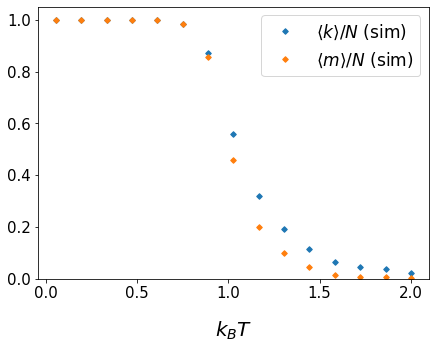

In [18]:
# Plot of simulation

plt.figure(figsize = (7,5))

# spectrum of temperature values
temp_vals1 = np.linspace(Tmin, Tmax, 100)
kvals = np.ones(len(temp_vals1))
mvals = np.ones(len(temp_vals1))

# plot of simulations
plt.plot(temp_vals, np.array(sim_kvals_1)/Np1,'D', label = r'$\langle k \rangle/N$ (sim)',  markersize = 4.0, )
plt.plot(temp_vals, np.array(sim_mvals_1)/Np1, 'D', label = r'$\langle m \rangle/N$ (sim)', markersize = 4.0, )

# plot design options
plt.xlabel(r'$k_B T$', fontsize = 20)
ax = plt.gca()
ax.set_ylim([0,1.05])
ax.yaxis.set_label_coords(-0.1,.5)
ax.xaxis.set_label_coords(.5,-.15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.legend(loc = 'best', fontsize = 17)

warnings.simplefilter("ignore")

plt.show()

#### Simulation for Type II

In [19]:
## Generate lf for each temperature from .03 to 2.0 in npoints steps

t0 = time.time()

# number of steps for MC algortihm
Nmc = 30000

# physical parameters
Np1 =  50 # Half of number of particles in system
E01 =14.00
Del = 3.45
Ev1 = 10**(-3)

# list of possible correct contacts (irrespective of order)
corr_list = [0]*(2*Np1)
for k in range(Np1):
    corr_list[k] = [k+1,Np1+k+1]
    corr_list[k+Np1] = [Np1+k+1, k+1]

# initial monomer and dimer states; 
# system in microstate of all correct dimers
mon_state_0 = []
dim_state_0 = corr_list[:Np1]

#mon_state_0 =list(range(1,2*Np1+1))
#dim_state_0 = []

npoints = 15 #number of temperature values
navg = 5 # number of times we run simulation at each temperature; 50 in paper
temp_vals = np.linspace(.055, 2.0, npoints).tolist()

# list of dimer values and stdev
sim_kvals_2 = [0]*npoints

# list of correct dimer values and stdev
sim_mvals_2 = [0]*npoints

for k in range(npoints):
    
    fin_kvals_2 = [0]*navg
    fin_mvals_2 = [0]*navg
    
    for j in range(navg): 
        
        # make copy of initial monomer and dimer states 
        mon_copy = copy.deepcopy(mon_state_0)
        dim_copy = copy.deepcopy(dim_state_0)

        # metroplois generator
        mon_state_list, dim_state_list, accepted = meth_dimer(Niter = Nmc, 
                                                             dim_init = dim_copy,
                                                             mon_init = mon_copy, 
                                                             Np = Np1, 
                                                             temp = temp_vals[k], 
                                                             E0 = E01, 
                                                             Delta = Del, 
                                                             Ev = Ev1)
        fin_kvals_2[j] = avg_k(dim_state_list, Nmc)
        fin_mvals_2[j] = avg_m(dim_state_list, Nmc, Np1)
    
    
    sim_kvals_2[k] = np.mean(np.array(fin_kvals_2))
    sim_mvals_2[k] = np.mean(np.array(fin_mvals_2))
    
    t_prelim = time.time()
    print("Temperature Run:",str(k+1),"; Current Time:", round(t_prelim-t0,2),"secs")
    

t1 = time.time()
print("Total Simulation Run Time:",t1-t0,"secs")

Temperature Run: 1 ; Current Time: 39.62 secs
Temperature Run: 2 ; Current Time: 77.69 secs
Temperature Run: 3 ; Current Time: 115.27 secs
Temperature Run: 4 ; Current Time: 152.04 secs
Temperature Run: 5 ; Current Time: 190.69 secs
Temperature Run: 6 ; Current Time: 228.59 secs
Temperature Run: 7 ; Current Time: 270.82 secs
Temperature Run: 8 ; Current Time: 323.33 secs
Temperature Run: 9 ; Current Time: 389.78 secs
Temperature Run: 10 ; Current Time: 458.43 secs
Temperature Run: 11 ; Current Time: 525.62 secs
Temperature Run: 12 ; Current Time: 591.62 secs
Temperature Run: 13 ; Current Time: 654.16 secs
Temperature Run: 14 ; Current Time: 711.16 secs
Temperature Run: 15 ; Current Time: 764.31 secs
Total Simulation Run Time: 764.3093056678772 secs


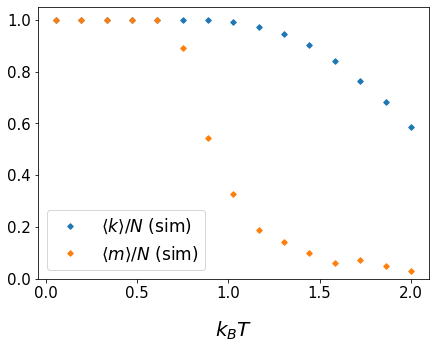

In [20]:
# Plot of simulation

plt.figure(figsize = (7,5))

# physical parameters
E0 =14.00
Del = 3.45
Ev = 0.001
Nelem = 50

# temperature limits
Tmin = .055
Tmax = 2.0


# spectrum of temperature values
temp_vals1 = np.linspace(Tmin, Tmax, 100)
kvals = np.ones(len(temp_vals1))
mvals = np.ones(len(temp_vals1))


# plot of simulations
plt.plot(temp_vals, np.array(sim_kvals_2)/Np1,'D', label = r'$\langle k \rangle/N$ (sim)',  markersize = 4.0, )
plt.plot(temp_vals, np.array(sim_mvals_2)/Np1, 'D', label = r'$\langle m \rangle/N$ (sim)', markersize = 4.0, )


# plot design options
plt.xlabel(r'$k_B T$', fontsize = 20)
ax = plt.gca()
ax.set_ylim([0,1.05])
ax.yaxis.set_label_coords(-0.1,.5)
ax.xaxis.set_label_coords(.5,-.15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.legend(loc = 'best', fontsize = 17)

warnings.simplefilter("ignore")

plt.show()

#### Simulation for indeterminate type

In [21]:
## Generate lf for each temperature from .03 to 2.0 in npoints steps

t0 = time.time()

# number of steps for MC algortihm
Nmc = 30000

# physical parameters
Np1 =  50 # Half of number of particles in system
E01 =9.05
Del =4.65
Ev1 = 10**(-3)

# list of possible correct contacts (irrespective of order)
corr_list = [0]*(2*Np1)
for k in range(Np1):
    corr_list[k] = [k+1,Np1+k+1]
    corr_list[k+Np1] = [Np1+k+1, k+1]

# initial monomer and dimer states; 
# system in microstate of all correct dimers
mon_state_0 = []
dim_state_0 = corr_list[:Np1]

npoints = 15 #number of temperature values
navg = 5 # number of times we run simulation at each temperature; 50 in paper
temp_vals = np.linspace(.055, 2.0, npoints).tolist()

# list of dimer values 
sim_kvals_3 = [0]*npoints

# list of correct dimer values 
sim_mvals_3 = [0]*npoints

for k in range(npoints):
    
    fin_kvals_3 = [0]*navg
    fin_mvals_3 = [0]*navg
    
    for j in range(navg): 
        
        # make copy of initial monomer and dimer states 
        mon_copy = copy.deepcopy(mon_state_0)
        dim_copy = copy.deepcopy(dim_state_0)

        # metroplois generator
        mon_state_list, dim_state_list, accepted = meth_dimer(Niter = Nmc, 
                                                             dim_init = dim_copy,
                                                             mon_init = mon_copy, 
                                                             Np = Np1, 
                                                             temp = temp_vals[k], 
                                                             E0 = E01, 
                                                             Delta = Del, 
                                                             Ev = Ev1)
        fin_kvals_3[j] = avg_k(dim_state_list, Nmc)
        fin_mvals_3[j] = avg_m(dim_state_list, Nmc, Np1)
    
    
    sim_kvals_3[k] = np.mean(np.array(fin_kvals_3))
    sim_mvals_3[k] = np.mean(np.array(fin_mvals_3))
    
    t_prelim = time.time()
    print("Temperature Run:",str(k+1),"; Current Time:", round(t_prelim-t0,2),"secs")
    

t1 = time.time()
print("Total Simulation Run Time:",t1-t0,"secs")

Temperature Run: 1 ; Current Time: 36.8 secs
Temperature Run: 2 ; Current Time: 73.55 secs
Temperature Run: 3 ; Current Time: 110.4 secs
Temperature Run: 4 ; Current Time: 147.08 secs
Temperature Run: 5 ; Current Time: 183.86 secs
Temperature Run: 6 ; Current Time: 222.74 secs
Temperature Run: 7 ; Current Time: 267.52 secs
Temperature Run: 8 ; Current Time: 324.31 secs
Temperature Run: 9 ; Current Time: 381.99 secs
Temperature Run: 10 ; Current Time: 436.97 secs
Temperature Run: 11 ; Current Time: 487.06 secs
Temperature Run: 12 ; Current Time: 531.92 secs
Temperature Run: 13 ; Current Time: 571.68 secs
Temperature Run: 14 ; Current Time: 607.01 secs
Temperature Run: 15 ; Current Time: 638.84 secs
Total Simulation Run Time: 638.8393840789795 secs


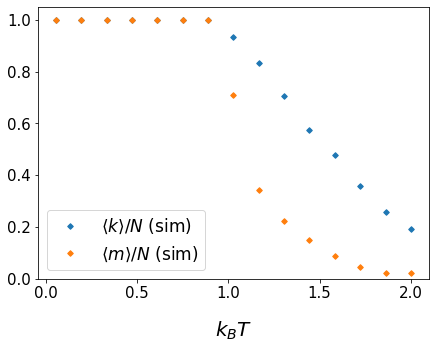

In [22]:
# Plot of simulation

plt.figure(figsize = (7,5))

# spectrum of temperature values
temp_vals1 = np.linspace(Tmin, Tmax, 100)
kvals = np.ones(len(temp_vals1))
mvals = np.ones(len(temp_vals1))

# plot of simulations
plt.plot(temp_vals, np.array(sim_kvals_3)/Np1,'D', label = r'$\langle k \rangle/N$ (sim)',  markersize = 4.0, )
plt.plot(temp_vals, np.array(sim_mvals_3)/Np1, 'D', label = r'$\langle m \rangle/N$ (sim)', markersize = 4.0, )

# plot design options
plt.xlabel(r'$k_B T$', fontsize = 20)
ax = plt.gca()
ax.set_ylim([0,1.05])
ax.yaxis.set_label_coords(-0.1,.5)
ax.xaxis.set_label_coords(.5,-.15)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.legend(loc = 'best', fontsize = 17)

warnings.simplefilter("ignore")

plt.show()

## III. Solutions and Simulations Together 

#### Type I example

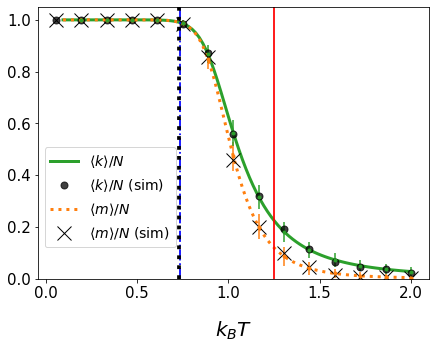

kBT_I = 0.7352029642942484
kBT_II = 1.248596635471849


In [23]:
## Plot of a <k> and <m> for a Type I dimer system

plt.figure(figsize = (7,5))

# physical parameters
E0 =4.15
Del =5.75
Ev = 10**(-3)
Nelem = 50

# temperature limits
Tmin = .055
Tmax = 2.0

# spectrum of temperature, k, and m values
temp_vals = np.linspace(Tmin, Tmax, 100)
kvals = np.ones(len(temp_vals))
mvals = np.ones(len(temp_vals))

for k in range(len(temp_vals)):
    mvals[k], kvals[k]  = fsolve(myfunc, [.05, 1.0], args = (temp_vals[k], E0,Del, Ev, Nelem))

# spectrum of temperature values; and k and m errors
temp_vals_err = np.linspace(Tmin, Tmax, 15)
kvals_err = np.ones(len(temp_vals_err))
mvals_err = np.ones(len(temp_vals_err))

for k in range(len(temp_vals_err)):
    mvals_err[k], kvals_err[k]  = fsolve(myfunc, [.05, 1.0], args = (temp_vals_err[k], E0,Del, Ev, Nelem))
    
#plot of k and m versus T; error bars
plt.errorbar(temp_vals_err[1:], mvals_err[1:]/Nelem, color = 'C1', fmt = '.', yerr = sigma_m(kvals_err[1:], mvals_err[1:], Nelem)/Nelem)
plt.errorbar(temp_vals_err[1:], kvals_err[1:]/Nelem, color = 'C2', fmt = '.', yerr = sigma_k(kvals_err[1:], Nelem)/Nelem)

# temperature for simulation results
temp_vals0 = np.linspace(.055, 2.0, 15).tolist()

# main plot and simulation
plt.plot(temp_vals[2:], kvals[2:]/Nelem, color = 'C2', linestyle='solid', label = r'$\langle k \rangle/N$', linewidth = 3.0)
plt.plot(temp_vals0, np.array(sim_kvals_1)/Np1,color = 'black', marker = 'o',
         linestyle='None', label = r'$\langle k \rangle/N$ (sim)',
         markersize = 7.0, alpha = 0.75)
plt.plot(temp_vals[2:], mvals[2:]/Nelem, color = 'C1', linestyle='dotted', label = r'$\langle m \rangle/N$', linewidth = 3.0)
plt.plot(temp_vals0, np.array(sim_mvals_1)/Np1, color = 'black', marker = 'x',
         linestyle='None', label = r'$\langle m \rangle/N$ (sim)', 
         markersize = 14.0, alpha = 1.0)

# plot of critical temperatures
plt.axvline(x= kbT1(E0, Del, Ev, Nelem).real, color = 'blue', linestyle='-.', linewidth = 1.75)
plt.axvline(x= kbT2(Del, Nelem), color = 'red', linestyle='solid', linewidth = 1.75)
plt.axvline(x= fsolve(Temp_func_new, 0.2, args = (E0, Del, Ev, Nelem))[0], color = 'k', linestyle=':', linewidth = 3.75)


# path design options
plt.xlabel(r'$k_B T$', fontsize = 20)
ax = plt.gca()
ax.set_ylim([0,1.05])
ax.yaxis.set_label_coords(-0.1,.5)
ax.xaxis.set_label_coords(.5,-.15)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(bbox_to_anchor = (.37,0.51), fontsize = 14)

warnings.simplefilter("ignore")

#plt.savefig("./typeIplot_wsim3.png", bbox_inches='tight')

plt.show()

#temperatures T_I and T_II 
print("kBT_I =", kbT1(E0, Del, Ev, Nelem).real)
print("kBT_II =",kbT2(Del, Nelem))

------

#### Type II example

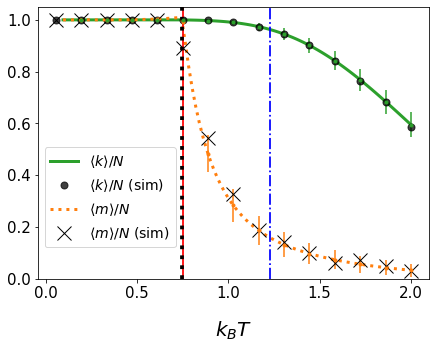

kBT_I = 1.2260437453743969
kBT_II = 0.7491579812831094


In [24]:
## Plot of a <k> and <m> for a Type II dimer system

plt.figure(figsize = (7,5))

# physical parameters
E0 =14.00
Del = 3.45
Ev = 0.001
Nelem = 50

# temperature limits
Tmin = .055
Tmax = 2.0


# spectrum of temperature values
temp_vals = np.linspace(Tmin, Tmax, 100)
kvals = np.ones(len(temp_vals))
mvals = np.ones(len(temp_vals))

# generating valus of m and k
for k in range(len(temp_vals)):
    
    mvals[k], kvals[k]  = fsolve(myfunc, [4.0, 4.0], args = (temp_vals[k], E0,Del, Ev, Nelem))


# spectrum of temperature values; and k and m errors
temp_vals_err = np.linspace(Tmin, Tmax, 15)
kvals_err = np.ones(len(temp_vals_err))
mvals_err = np.ones(len(temp_vals_err))

for k in range(len(temp_vals_err)):
    mvals_err[k], kvals_err[k]  = fsolve(myfunc, [.05, 1.0], args = (temp_vals_err[k], E0,Del, Ev, Nelem))

#plot of k and m versus T; errors
plt.errorbar(temp_vals_err[1:], mvals_err[1:]/Nelem, color = 'C1', fmt = '.', yerr = sigma_m(kvals_err[1:], mvals_err[1:], Nelem)/Nelem)
plt.errorbar(temp_vals_err[1:], kvals_err[1:]/Nelem, color = 'C2', fmt = '.', yerr = sigma_k(kvals_err[1:], Nelem)/Nelem)

# temperature for simulation results
temp_vals0 = np.linspace(.055, 2.0, 15).tolist()

# main plot and simulation
plt.plot(temp_vals[2:], kvals[2:]/Nelem, color = 'C2', linestyle='solid', label = r'$\langle k \rangle/N$', linewidth = 3.0)
plt.plot(temp_vals0, np.array(sim_kvals_2)/Np1,color = 'black', marker = 'o',
         linestyle='None', label = r'$\langle k \rangle/N$ (sim)',
         markersize = 7.0, alpha = 0.75)
plt.plot(temp_vals[2:], mvals[2:]/Nelem, color = 'C1', linestyle='dotted', label = r'$\langle m \rangle/N$', linewidth = 3.0)
plt.plot(temp_vals0, np.array(sim_mvals_2)/Np1, color = 'black', marker = 'x',
         linestyle='None', label = r'$\langle m \rangle/N$ (sim)', 
         markersize = 14.0, alpha = 1.0)


# plot of critical temperatures
plt.axvline(x= kbT1(E0, Del, Ev, Nelem).real, color = 'blue', linestyle='-.', linewidth = 1.75)
plt.axvline(x= kbT2(Del, Nelem), color = 'red', linestyle='solid', linewidth = 1.75)
plt.axvline(x= fsolve(Temp_func_new, 0.2, args = (E0, Del, Ev, Nelem))[0], color = 'k', linestyle=':', linewidth = 3.75)


# path design options
plt.xlabel(r'$k_B T$', fontsize = 20)
ax = plt.gca()
ax.set_ylim([0,1.05])
ax.yaxis.set_label_coords(-0.1,.5)
ax.xaxis.set_label_coords(.5,-.15)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(bbox_to_anchor = (.37,.51), fontsize = 14)

warnings.simplefilter("ignore")

#plt.savefig("./typeIIplot_wsim3.png", bbox_inches='tight')

plt.show()

#temperatures T_I and T_II 
print("kBT_I =", kbT1(E0, Del, Ev, Nelem).real)
print("kBT_II =",kbT2(Del, Nelem))

------

#### Indeterminate example

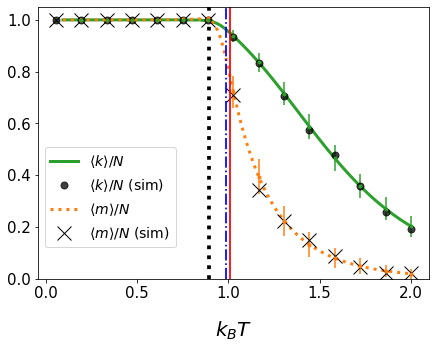

kBT_I = 0.9852696789666392
kBT_II = 1.0097346704250605


In [25]:
##  Plot of a <k> and <m> for system intermediate between Types I and II dimer system

plt.figure(figsize = (7,5))

# physical parameters
E0 =9.05
Del =4.65
Ev = 10**(-3)
Nelem = 50

# temperature limits
Tmin = .055
Tmax = 2.0

# spectrum of temperature values
temp_vals = np.linspace(Tmin, Tmax, 100)
kvals = np.ones(len(temp_vals))
mvals = np.ones(len(temp_vals))

# generating valus of m and k
for k in range(len(temp_vals)):

    mvals[k], kvals[k]  = fsolve(myfunc, [.5, 1.0], args = (temp_vals[k], E0,Del, Ev, Nelem))

# spectrum of temperature values; and k and m errors
temp_vals_err = np.linspace(Tmin, Tmax, 15)
kvals_err = np.ones(len(temp_vals_err))
mvals_err = np.ones(len(temp_vals_err))

for k in range(len(temp_vals_err)):
    mvals_err[k], kvals_err[k]  = fsolve(myfunc, [.05, 1.0], args = (temp_vals_err[k], E0,Del, Ev, Nelem))

#plot of k and m versus T; errors
plt.errorbar(temp_vals_err[1:], mvals_err[1:]/Nelem, color = 'C1', fmt = '.', yerr = sigma_m(kvals_err[1:], mvals_err[1:], Nelem)/Nelem)
plt.errorbar(temp_vals_err[1:], kvals_err[1:]/Nelem, color = 'C2', fmt = '.', yerr = sigma_k(kvals_err[1:], Nelem)/Nelem)

# temperature for simulation results
temp_vals0 = np.linspace(.055, 2.0, 15).tolist()

# main plot and simulation
plt.plot(temp_vals[2:], kvals[2:]/Nelem, color = 'C2', linestyle='solid', label = r'$\langle k \rangle/N$', linewidth = 3.0)
plt.plot(temp_vals0, np.array(sim_kvals_3)/Np1,color = 'black', marker = 'o',
         linestyle='None', label = r'$\langle k \rangle/N$ (sim)',
         markersize = 7.0, alpha = 0.75)
plt.plot(temp_vals[2:], mvals[2:]/Nelem, color = 'C1', linestyle='dotted', label = r'$\langle m \rangle/N$', linewidth = 3.0)
plt.plot(temp_vals0, np.array(sim_mvals_3)/Np1, color = 'black', marker = 'x',
         linestyle='None', label = r'$\langle m \rangle/N$ (sim)', 
         markersize = 14.0, alpha = 1.0)


plt.axvline(x= kbT1(E0, Del, Ev, Nelem).real, color = 'blue', linestyle='-.', linewidth = 1.75)
plt.axvline(x= kbT2(Del, Nelem), color = 'red', linestyle='solid', linewidth = 1.75)
plt.axvline(x= fsolve(Temp_func_new, 0.2, args = (E0, Del, Ev, Nelem))[0], color = 'k', linestyle=':', linewidth = 3.75)


# path design options
plt.xlabel(r'$k_B T$', fontsize = 20)
ax = plt.gca()
ax.set_ylim([0,1.05])
ax.yaxis.set_label_coords(-0.1,.5)
ax.xaxis.set_label_coords(.5,-.15)


plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(bbox_to_anchor = (.37,.51), fontsize = 14)

warnings.simplefilter("ignore")

#plt.savefig("./typeIandIIplot_wsim3.png", bbox_inches='tight')

plt.show()

#temperatures T_I and T_II 
print("kBT_I =", kbT1(E0, Del, Ev, Nelem).real)
print("kBT_II =",kbT2(Del, Nelem))

------

In [26]:
print('Elapsed Time: %.3f min' % ((time.time()-start_clock)/60))

Elapsed Time: 31.905 min
